## Air Bnb Capstone ##

### Can I buy a property that pays for itself in NYC? ###

Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches

Assign data

In [2]:
lst = pd.read_csv('~/Downloads/listings.csv', delimiter = ',', header = 0)
#cal = pd.read_csv('~/Downloads/listings.csv.gz', delimiter = ',', header = 0)
rev = pd.read_csv('~/Downloads/reviews.csv', delimiter = ',', header = 0)
hood = pd.read_csv('~/Downloads/neighbourhoods.csv', delimiter = ',', header = 0)

/Users/belisariomontesinos/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Get a feel for the data

In [3]:
rev.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2060,158,2008-09-22,2865,Thom,"very nice neighborhood,close enough to ""A"" tra..."
1,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r\nNous avons app...


In [4]:
lst.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2060,https://www.airbnb.com/rooms/2060,20200707031313,2020-07-08,Modern NYC,NaN,"Lovely, spacious, sunny 1 BR apartment in 6th ...","Lovely, spacious, sunny 1 BR apartment in 6th ...",none,NaN,...,f,f,flexible,f,f,1,0,1,0,0.01
1,2595,https://www.airbnb.com/rooms/2595,20200707031313,2020-07-08,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.37


In [5]:
lst.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


___________________________

Check this warning out:  DtypeWarning: Columns (61,62,94) have mixed types.

In [6]:
#lst.iloc[:, [61]]
#lst.iloc[:, [62]]
#lst.iloc[:, [94]]

Look more into the lst data

In [7]:
#lst.info()
lst.describe()
#lst.shape

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_listings_count,host_total_listings_count,latitude,longitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.858800e+04,4.858800e+04,0.0,0.0,0.0,4.858800e+04,48576.000000,48576.000000,48588.000000,48588.000000,...,36247.000000,36219.000000,36238.000000,36215.000000,36216.000000,48588.000000,48588.000000,48588.000000,48588.000000,37230.000000
mean,2.306509e+07,2.020071e+13,NaN,NaN,NaN,8.548647e+07,16.138710,16.138710,40.729365,-73.951143,...,9.269043,9.726470,9.727413,9.592572,9.382069,5.917140,3.698053,2.020931,0.095415,0.959229
std,1.362972e+07,0.000000e+00,NaN,NaN,NaN,9.959082e+07,122.046309,122.046309,0.054881,0.047500,...,1.128800,0.790166,0.819118,0.791750,0.978356,23.556815,21.313062,10.265608,0.849292,1.304544
min,2.060000e+03,2.020071e+13,NaN,NaN,NaN,2.259000e+03,0.000000,0.000000,40.499790,-74.240840,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.085637e+07,2.020071e+13,NaN,NaN,NaN,9.232804e+06,1.000000,1.000000,40.689920,-73.983380,...,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.140000
50%,2.236088e+07,2.020071e+13,NaN,NaN,NaN,3.784629e+07,1.000000,1.000000,40.724060,-73.955425,...,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.420000
75%,3.577099e+07,2.020071e+13,NaN,NaN,NaN,1.377744e+08,2.000000,2.000000,40.763023,-73.934430,...,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,1.000000,0.000000,1.320000
max,4.410453e+07,2.020071e+13,NaN,NaN,NaN,3.539906e+08,1834.000000,1834.000000,40.911690,-73.712990,...,10.000000,10.000000,10.000000,10.000000,10.000000,261.000000,261.000000,148.000000,24.000000,50.290000


In [8]:
hstlst = lst['host_listings_count']
hstlst.max()

1834.0

________

Start looking at visual representations of data

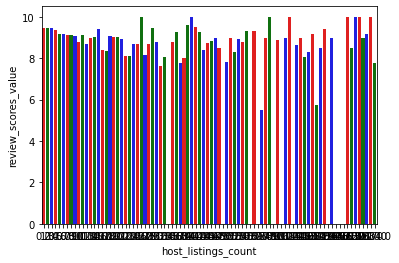

In [9]:
ax = sns.barplot(x = 'host_listings_count' , y = 'review_scores_value', data = lst, palette = ["red", "green", "blue"], ci = False)

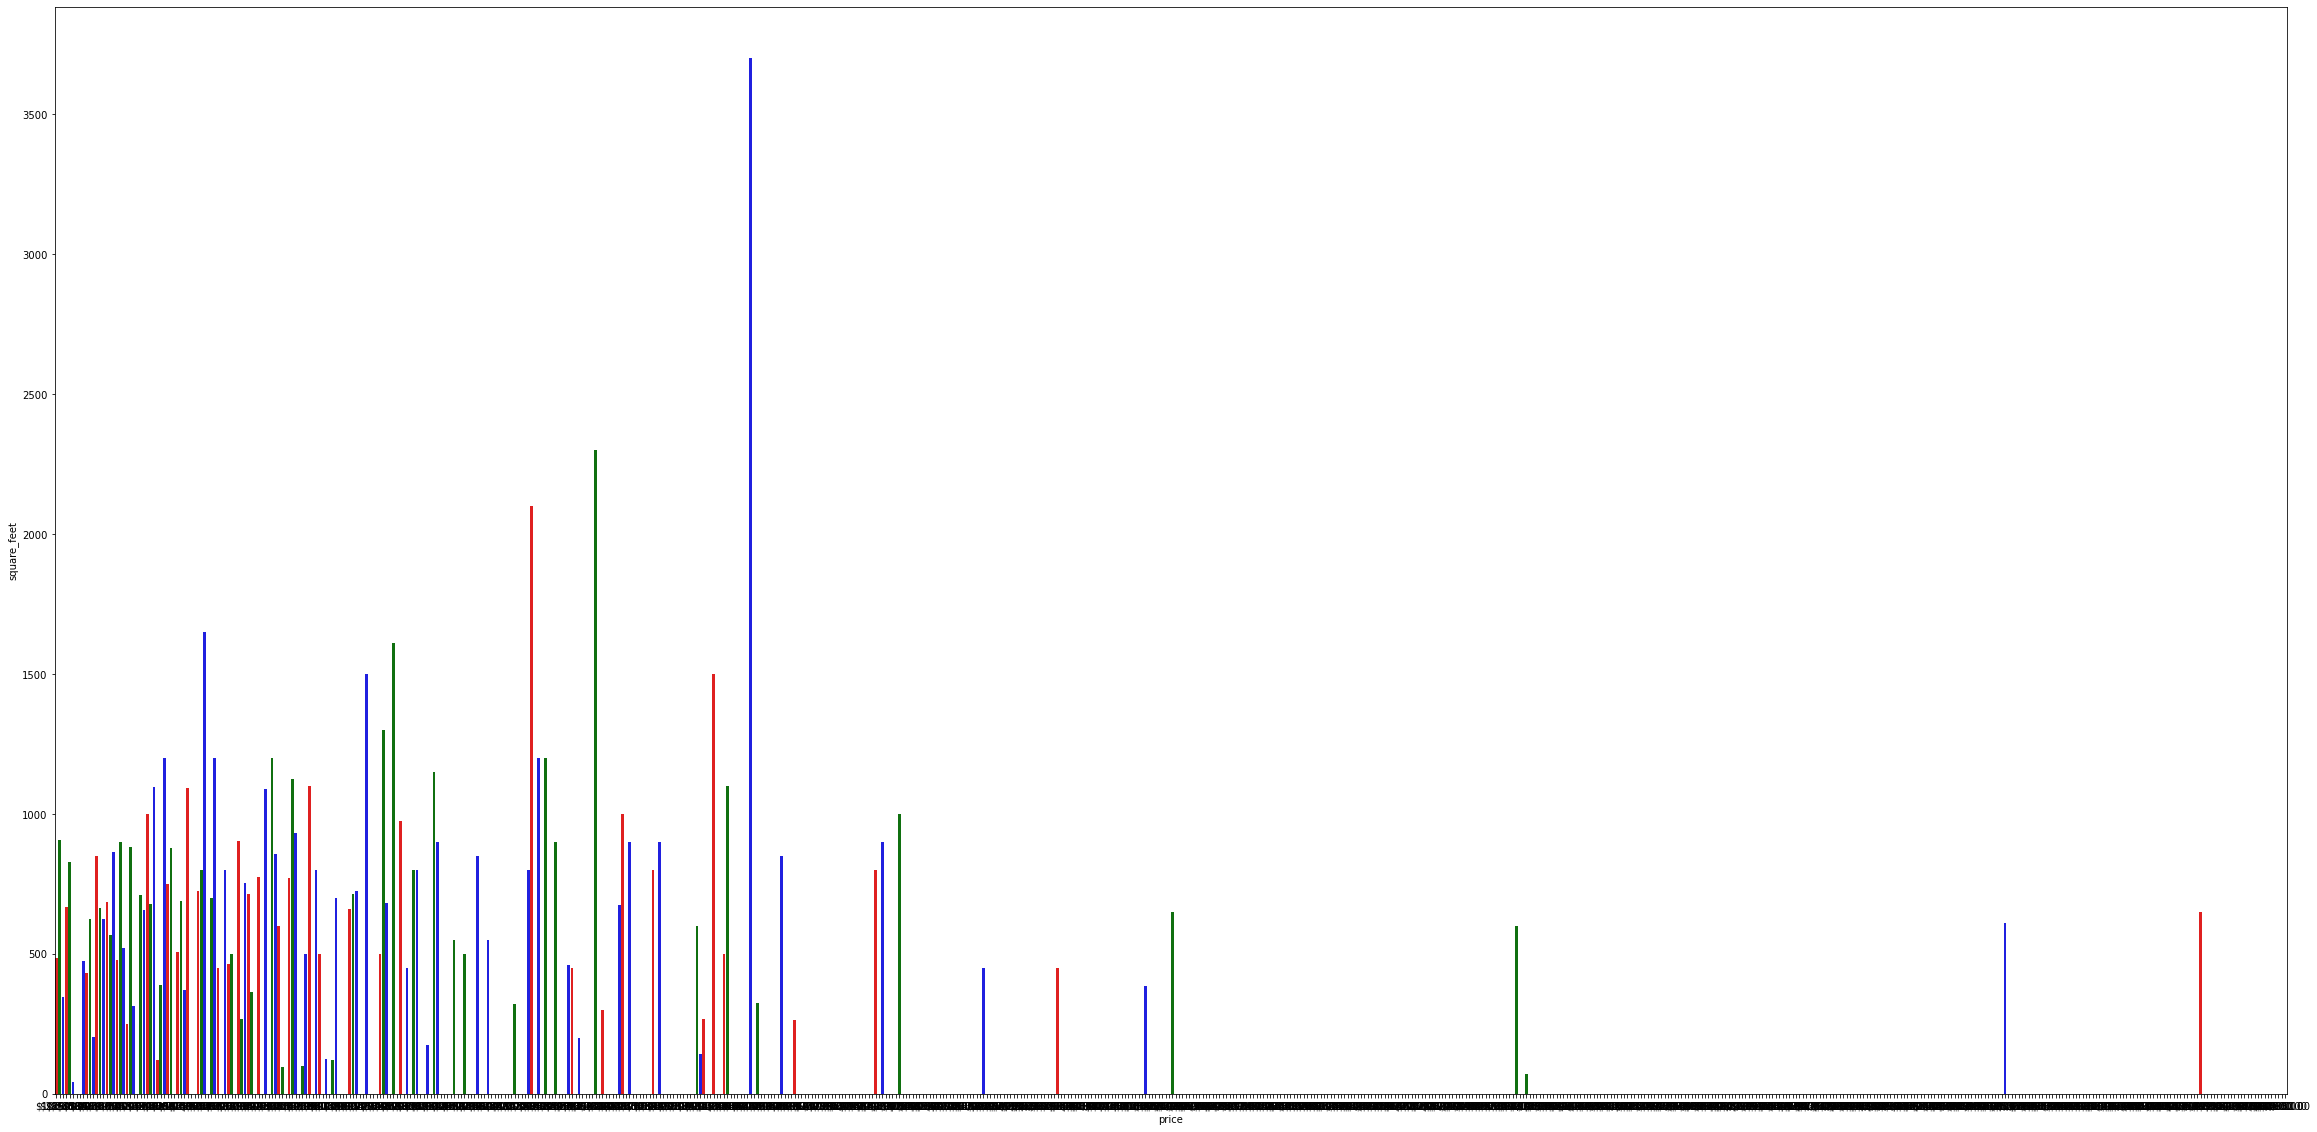

In [10]:
plt.figure(figsize=(40,20))
pricexfeet = sns.barplot(x = 'price' , y = 'square_feet', data = lst, palette = ["red", "green", "blue"], ci = False) 

Price is important in trying to solve my question, let's try to lock in on a price range.

In [11]:
price_range = pd.DataFrame(lst.groupby(['price']))
price_range

,0,1
0,$0.00,id lis...
1,"$1,000.00",id lis...
2,"$1,001.00",id lis...
3,"$1,002.00",id lis...
4,"$1,020.00",id lis...
...,...,...
657,$980.00,id lis...
658,$985.00,id listin...
659,$99.00,id lis...
660,$995.00,id lis...


In [12]:
lst['price'] = lst['price'].str.replace('$', '')
lst['price'] = lst['price'].str.replace(',', '')
lst['price'] = lst['price'].astype(float)
lst.nlargest(100,['price'])['price']

15160    10000.0
15206    10000.0
22449    10000.0
24396    10000.0
32240    10000.0
          ...   
3168      5250.0
16484     5000.0
19408     5000.0
21702     5000.0
21712     5000.0
Name: price, Length: 100, dtype: float64

A suggestion:
Get a count for listings per price, make a histogram so they are bunched(sns), make it a field - a new column categorized by range.

Solution:
Did not need to do this, as I found the a range that worked for me.

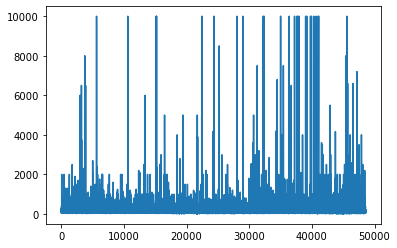

In [13]:
lst['price'].plot.line()


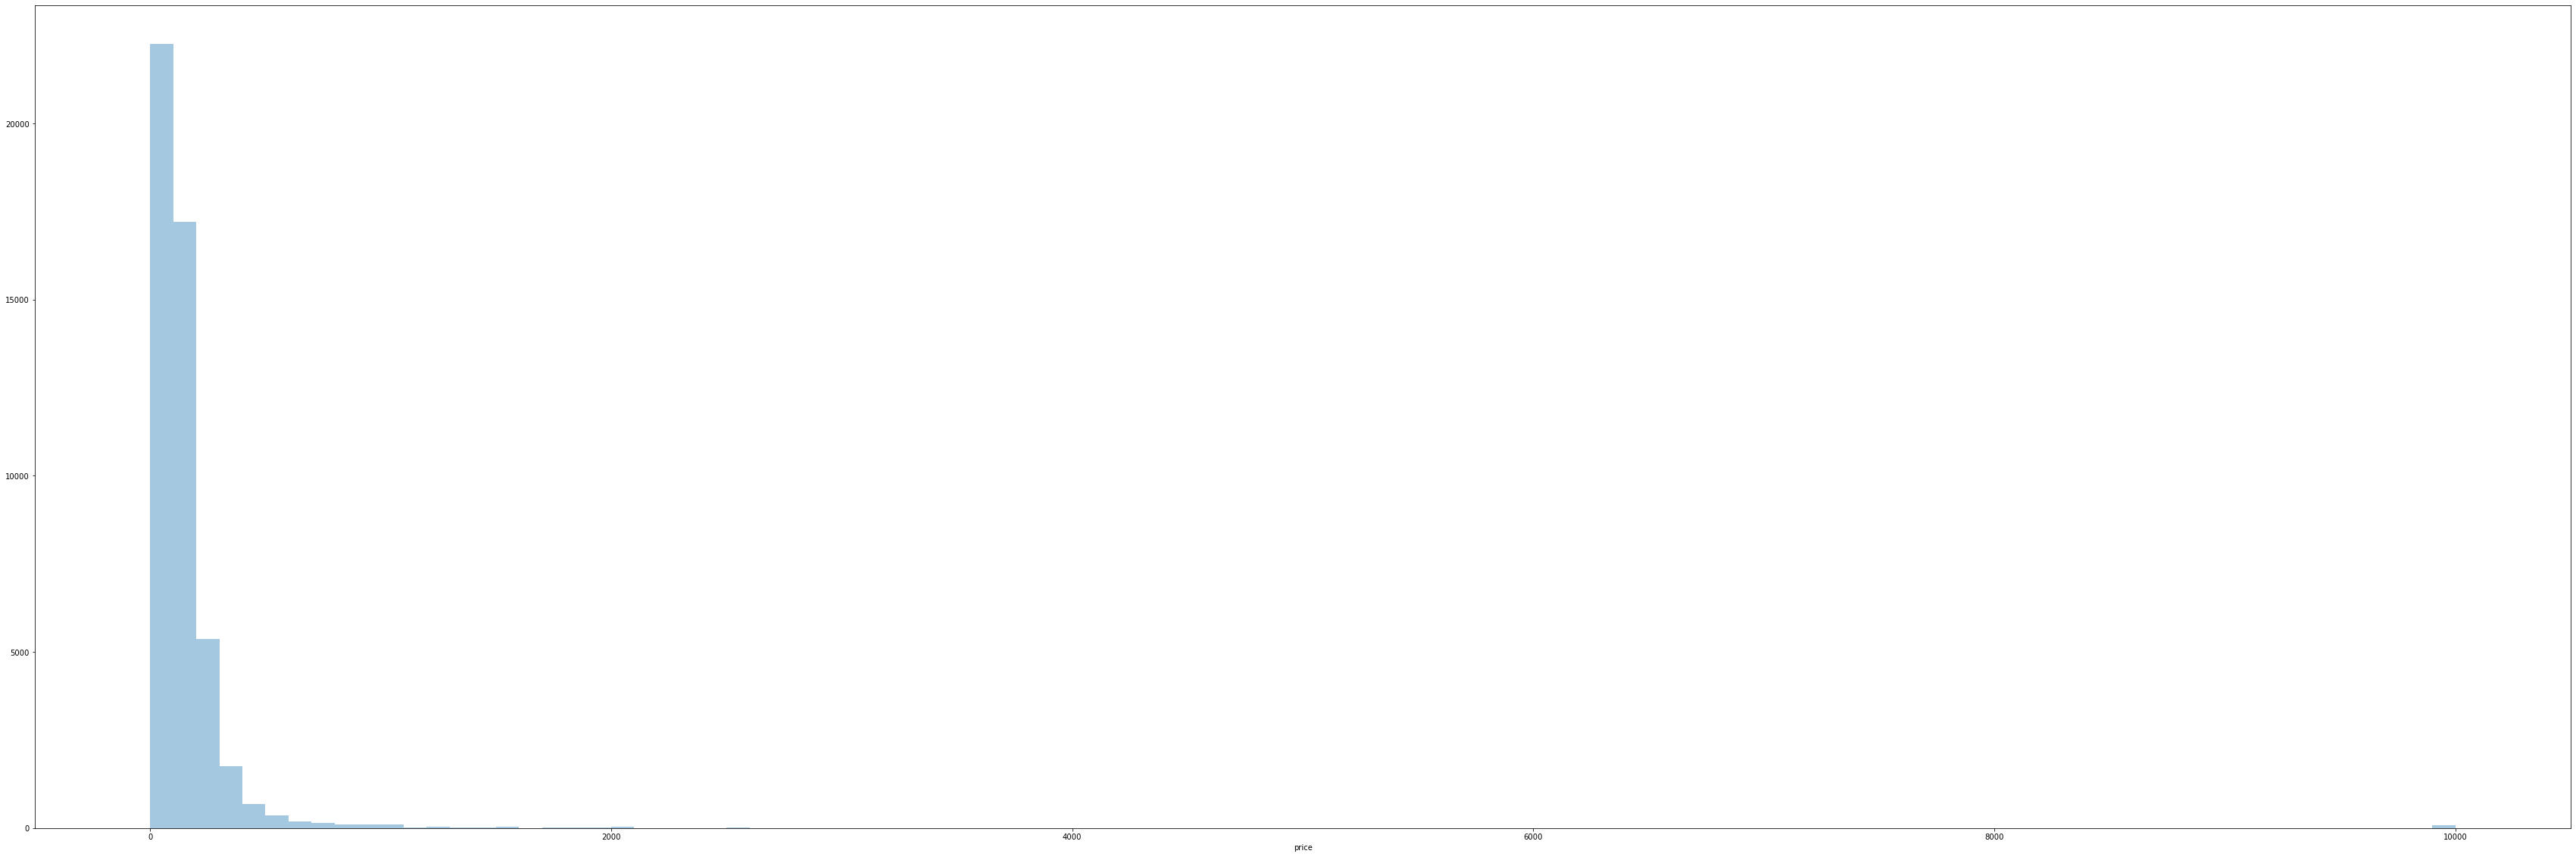

In [14]:
plt.figure(figsize=(60,20))
sns.distplot(lst['price'], bins=100, kde=False);

The graph above gave me my range of $0 - $2000. Now let me make a new df with this range.

In [15]:
##new dataframe using loc - from lst price less <= x. 
canbuy = lst.loc[(lst['price'] <= 2000)]
canbuy.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2060,https://www.airbnb.com/rooms/2060,20200707031313,2020-07-08,Modern NYC,NaN,"Lovely, spacious, sunny 1 BR apartment in 6th ...","Lovely, spacious, sunny 1 BR apartment in 6th ...",none,NaN,...,f,f,flexible,f,f,1,0,1,0,0.01
1,2595,https://www.airbnb.com/rooms/2595,20200707031313,2020-07-08,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.37


In [18]:
#hoodgroup = pd.DataFrame(canbuy.groupby('neighbourhood')['price'].count())

hoodgroup = canbuy.groupby('neighbourhood').agg(count=('neighbourhood', 'size'), mean_sent=('price', 'mean')).reset_index()
hoodgroup

,neighbourhood,count,mean_sent
0,Allerton,7,61.571429
1,Alphabet City,266,163.642857
2,Annadale,2,131.500000
3,Astoria,655,102.677863
4,Bath Beach,10,103.700000
...,...,...,...
190,Williamsburg,1634,138.243574
191,Windsor Terrace,61,120.442623
192,Woodhaven,54,73.666667
193,Woodlawn,1,250.000000


In [19]:
hoodgroups = canbuy.groupby('neighbourhood').agg(count=('neighbourhood', 'size'), mean_price=('price', 'mean')).reset_index()
hoodgroups

,neighbourhood,count,mean_price
0,Allerton,7,61.571429
1,Alphabet City,266,163.642857
2,Annadale,2,131.500000
3,Astoria,655,102.677863
4,Bath Beach,10,103.700000
...,...,...,...
190,Williamsburg,1634,138.243574
191,Windsor Terrace,61,120.442623
192,Woodhaven,54,73.666667
193,Woodlawn,1,250.000000


Now to order it by count (for our graph)

In [20]:
tophood = hoodgroups[hoodgroups['count'] > 100 ]
#.sort_values(by=['count'], ascending=False)
tophood

,neighbourhood,count,mean_price
1,Alphabet City,266,163.642857
3,Astoria,655,102.677863
6,Bay Ridge,120,104.091667
10,Bedford-Stuyvesant,1702,106.968273
14,Boerum Hill,102,182.000000
18,Brooklyn,10773,120.830595
23,Bushwick,916,84.930131
24,Canarsie,113,110.805310
28,Chelsea,548,212.640511
29,Chinatown,259,187.586873


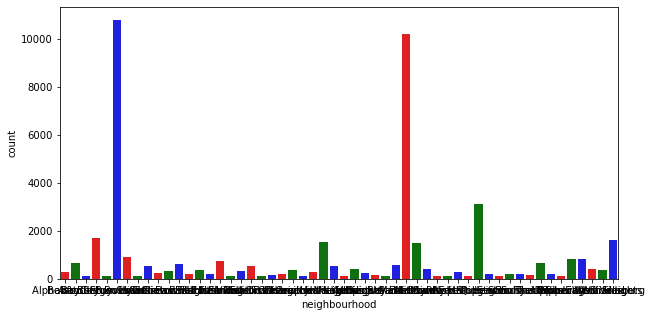

In [21]:
plt.figure(figsize=(10,5))
hoodcount = sns.barplot(x = 'neighbourhood' , y = 'count', data = tophood, palette = ["red", "green", "blue"], ci = False) 

Drop the bouroughs, then graph the neighborhoods and the amount of listings they have.

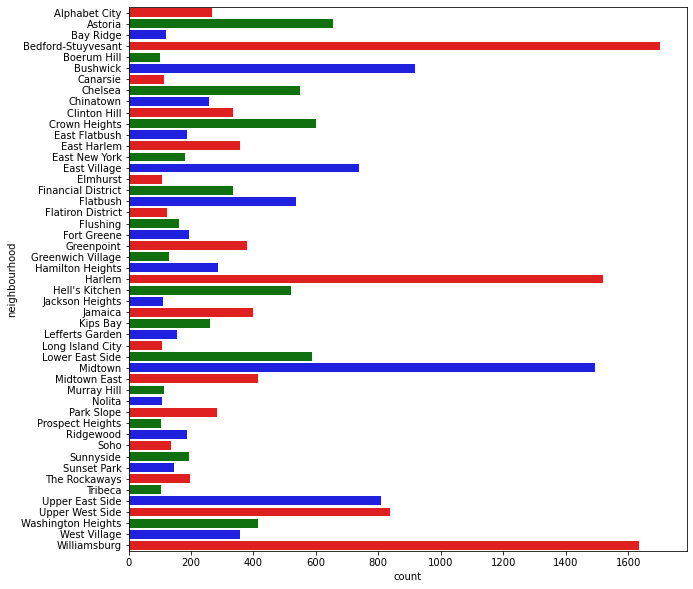

In [22]:
#th = tophood.drop(['Brooklyn', 'Manhattan', 'The Bronx'])
th = tophood.drop([18, 107, 144, 164, 167])

plt.figure(figsize=(10,10))
hoodscount = sns.barplot(x = 'count' , y = 'neighbourhood', data = th, palette = ["red", "green", "blue"],  ci = False) 

Grab all the data from our original df, that matches our new neighborhood and price list.

In [23]:
#canbuy where neighborhood in th
okay = canbuy[canbuy['neighbourhood'].isin(th['neighbourhood'])]
okay

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2060,https://www.airbnb.com/rooms/2060,20200707031313,2020-07-08,Modern NYC,NaN,"Lovely, spacious, sunny 1 BR apartment in 6th ...","Lovely, spacious, sunny 1 BR apartment in 6th ...",none,NaN,...,f,f,flexible,f,f,1,0,1,0,0.01
4,5099,https://www.airbnb.com/rooms/5099,20200707031313,2020-07-07,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,f,f,moderate,t,t,1,1,0,0,0.57
8,5203,https://www.airbnb.com/rooms/5203,20200707031313,2020-07-07,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Stay in my family's little guest room and enj...,"Our best guests are seeking a safe, clean, spa...",none,Our neighborhood is full of restaurants and ca...,...,f,f,flexible,t,t,1,0,1,0,0.89
9,5238,https://www.airbnb.com/rooms/5238,20200707031313,2020-07-08,Cute & Cozy Lower East Side 1 bdrm,"Live like a New Yorker instead of a stuffy, ti...",PLEASE NOTE: do not automatically book with ou...,"Live like a New Yorker instead of a stuffy, ti...",none,"Historically, the Lower East Side was a stoppi...",...,f,f,strict_14_with_grace_period,f,f,4,2,0,2,1.22
11,5803,https://www.airbnb.com/rooms/5803,20200707031313,2020-07-08,"Lovely Room 1, Garden, Best Area, Legal rental","Discounted now! Beautiful house, gorgeous ga...","Welcome to an historic, stunning 4-story Brook...","Discounted now! Beautiful house, gorgeous ga...",none,Neighborhood is amazing! Best subways to Manha...,...,f,f,strict_14_with_grace_period,t,f,3,1,2,0,1.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48564,44088976,https://www.airbnb.com/rooms/44088976,20200707031313,2020-07-08,Spacious work-from-home oasis,The ultimate work-from-home oasis. Newly renov...,Duplex condo apartment - garden level and firs...,The ultimate work-from-home oasis. Newly renov...,none,Clinton Hill - the heart of brownstone Brookly...,...,f,f,flexible,f,f,1,1,0,0,NaN
48565,44089440,https://www.airbnb.com/rooms/44089440,20200707031313,2020-07-08,Charming 2 bedroom in the heart of Astoria,Our charming 2-bedroom is perfect for your sta...,The second bedroom is currently styled as a ho...,Our charming 2-bedroom is perfect for your sta...,none,"Astoria, named the #1 coolest neighborhood in ...",...,t,f,flexible,f,f,1,1,0,0,NaN
48568,44097382,https://www.airbnb.com/rooms/44097382,20200707031313,2020-07-07,Get Inspired in SOHO - 1BR Apartment,This lovely 1BR apartment is located in prime ...,NaN,This lovely 1BR apartment is located in prime ...,none,NaN,...,t,f,flexible,f,f,1,1,0,0,NaN
48575,44100164,https://www.airbnb.com/rooms/44100164,20200707031313,2020-07-08,"Modern, luxurious apt in NYC w/ private terrace!","Amazing, luxurious and modern 1 bedroom apt wi...",The space the layout of the apartment is: - Br...,"Amazing, luxurious and modern 1 bedroom apt wi...",none,NaN,...,t,f,flexible,f,f,1,1,0,0,NaN


In [24]:
okay.loc[okay['neighbourhood'] == 'Jackson Heights']

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
923,448048,https://www.airbnb.com/rooms/448048,20200707031313,2020-07-08,"1 BR, Book it 1st then write me",Please 1st LMK your Check in time . No late e...,"Clean, quiet and separate room for your stay. ...",Please 1st LMK your Check in time . No late e...,none,1 block from 24x7 subway. All kinds of food an...,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,0.35
924,448049,https://www.airbnb.com/rooms/448049,20200707031313,2020-07-08,"No Inq,Read it, 1 BR, Rt of Subway,","Nice, simple and very convenient place to live...",Pl No Inquiries for availability on your dates...,"Nice, simple and very convenient place to live...",none,very live and mixed neighborhood. Close to eve...,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,0.56
1006,495249,https://www.airbnb.com/rooms/495249,20200707031313,2020-07-08,10min Walk & 15mins to Tourist Spot,We have 5 STAR reviews from beginning' till no...,Spacious room which can accommodate one person...,We have 5 STAR reviews from beginning' till no...,none,Our neighborhood is a melting pot of cultures ...,...,t,f,strict_14_with_grace_period,t,t,2,0,2,0,2.45
1325,689329,https://www.airbnb.com/rooms/689329,20200707031313,2020-07-08,Cozy 15 mins Manhattan& 10 Mins LGA,"My place is located in Queens, NYC close to La...",Stylish & modern sleeper in a Junior 1 Bedroom...,"My place is located in Queens, NYC close to La...",none,This neighborhood has many different kinds of ...,...,t,f,strict_14_with_grace_period,t,t,2,0,2,0,3.52
1741,890794,https://www.airbnb.com/rooms/890794,20200707031313,2020-07-08,Cozy- bedroom in Jackson Heights!,The apartment is located in the heart of the H...,Your bedroom is private and it's furnished wit...,The apartment is located in the heart of the H...,none,NaN,...,f,f,moderate,t,f,1,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47759,43668278,https://www.airbnb.com/rooms/43668278,20200707031313,2020-07-08,New Bath&Kitchen 25min subway ride from Manhattan,This apartment is located in Jackson Heights Q...,The apartment is fully remodeled in 2020 and w...,This apartment is located in Jackson Heights Q...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,71,2,69,0,NaN
47766,43668946,https://www.airbnb.com/rooms/43668946,20200707031313,2020-07-08,Good location♪ 5min from station!,This apartment is located in Jackson Heights Q...,The apartment is fully remodeled in 2020 and w...,This apartment is located in Jackson Heights Q...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,75,2,73,0,NaN
48345,43986314,https://www.airbnb.com/rooms/43986314,20200707031313,2020-07-08,Good location 4min from subway 7 Line,This apartment is located in Jackson Heights Q...,The apartment is fully remodeled in 2020 and w...,This apartment is located in Jackson Heights Q...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,89,2,87,0,NaN
48346,43986380,https://www.airbnb.com/rooms/43986380,20200707031313,2020-07-08,Beautiful New apartment in Jacksonheights,This apartment is located in Jackson Heights Q...,The apartment is fully remodeled in 2020 and w...,This apartment is located in Jackson Heights Q...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,71,2,69,0,NaN


Add the 2 other columns from our th(tophood) df. The columns are count and mean_price and we match them to neighborhood.

In [25]:
okay = okay.append(th)
okay

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,count,mean_price
0,2060.0,https://www.airbnb.com/rooms/2060,2.020071e+13,2020-07-08,Modern NYC,NaN,"Lovely, spacious, sunny 1 BR apartment in 6th ...","Lovely, spacious, sunny 1 BR apartment in 6th ...",none,NaN,...,flexible,f,f,1.0,0.0,1.0,0.0,0.01,NaN,NaN
4,5099.0,https://www.airbnb.com/rooms/5099,2.020071e+13,2020-07-07,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,moderate,t,t,1.0,1.0,0.0,0.0,0.57,NaN,NaN
8,5203.0,https://www.airbnb.com/rooms/5203,2.020071e+13,2020-07-07,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Stay in my family's little guest room and enj...,"Our best guests are seeking a safe, clean, spa...",none,Our neighborhood is full of restaurants and ca...,...,flexible,t,t,1.0,0.0,1.0,0.0,0.89,NaN,NaN
9,5238.0,https://www.airbnb.com/rooms/5238,2.020071e+13,2020-07-08,Cute & Cozy Lower East Side 1 bdrm,"Live like a New Yorker instead of a stuffy, ti...",PLEASE NOTE: do not automatically book with ou...,"Live like a New Yorker instead of a stuffy, ti...",none,"Historically, the Lower East Side was a stoppi...",...,strict_14_with_grace_period,f,f,4.0,2.0,0.0,2.0,1.22,NaN,NaN
11,5803.0,https://www.airbnb.com/rooms/5803,2.020071e+13,2020-07-08,"Lovely Room 1, Garden, Best Area, Legal rental","Discounted now! Beautiful house, gorgeous ga...","Welcome to an historic, stunning 4-story Brook...","Discounted now! Beautiful house, gorgeous ga...",none,Neighborhood is amazing! Best subways to Manha...,...,strict_14_with_grace_period,t,f,3.0,1.0,2.0,0.0,1.32,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,810.0,178.617284
179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,837.0,187.076464
183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,416.0,93.728365
185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,357.0,241.226891


In [26]:
df = pd.merge(okay, th, on='neighbourhood')
                #how='inner')
#.fillna(method='ffill')
df

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,count_x,mean_price_x,count_y,mean_price_y
0,2060.0,https://www.airbnb.com/rooms/2060,2.020071e+13,2020-07-08,Modern NYC,NaN,"Lovely, spacious, sunny 1 BR apartment in 6th ...","Lovely, spacious, sunny 1 BR apartment in 6th ...",none,NaN,...,f,1.0,0.0,1.0,0.0,0.01,NaN,NaN,416,93.728365
1,71010.0,https://www.airbnb.com/rooms/71010,2.020071e+13,2020-07-08,All That Jazz. Uptown style on Sugar Hill.,Your pied a terre on Sugar Hill in Washington ...,Your pied a terre on Sugar Hill. You'll be th...,Your pied a terre on Sugar Hill in Washington ...,none,Sugar Hill. Jazz lives. You have arrived. O...,...,f,2.0,2.0,0.0,0.0,0.40,NaN,NaN,416,93.728365
2,100002.0,https://www.airbnb.com/rooms/100002,2.020071e+13,2020-07-08,"MANHATTAN Cozy, Neat, Nice, Bright ROOM","I rent out a bedroom 1 or 2 people, Manhatta...","My apartment is quiet, It receives natural Su...","I rent out a bedroom 1 or 2 people, Manhatta...",none,My Neighborhood is also called Hudson Heigh...,...,f,1.0,0.0,1.0,0.0,1.36,NaN,NaN,416,93.728365
3,272026.0,https://www.airbnb.com/rooms/272026,2.020071e+13,2020-07-08,1 Bd. MANHATTAN NY Entire Apt. 1 yr-6 months min.,LONG TERM rental (1 -2 individuals max) .--> f...,LONG TERM RENT - FURNISHED ENTIRE APARTMENT in...,LONG TERM rental (1 -2 individuals max) .--> f...,none,It's very typical New York (Manhattan) neighbo...,...,f,1.0,1.0,0.0,0.0,0.34,NaN,NaN,416,93.728365
4,430427.0,https://www.airbnb.com/rooms/430427,2.020071e+13,2020-07-07,"Very clean, quiet bedroom available","Comfy bed, very quiet and close to transportat...","Hi! This very clean, quiet room is part of a v...","Comfy bed, very quiet and close to transportat...",none,Our apartment is located directly across the s...,...,f,1.0,0.0,1.0,0.0,0.13,NaN,NaN,416,93.728365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20567,42817298.0,https://www.airbnb.com/rooms/42817298,2.020071e+13,2020-07-08,A travelers safe comfortable beautiful home.,This is a home away from home. This Property i...,The shared guest kitchen consists of a microwa...,This is a home away from home. This Property i...,none,"5 min walk to Health food juice bar, Popeyes, ...",...,f,2.0,0.0,2.0,0.0,NaN,NaN,NaN,113,110.805310
20568,42830119.0,https://www.airbnb.com/rooms/42830119,2.020071e+13,2020-07-08,A welcoming business Trip room,This is a home away from home. This Property i...,The shared guest kitchen consists of a microwa...,This is a home away from home. This Property i...,none,"5 min walk to Health food juice bar, Popeyes, ...",...,f,2.0,0.0,2.0,0.0,NaN,NaN,NaN,113,110.805310
20569,43997163.0,https://www.airbnb.com/rooms/43997163,2.020071e+13,2020-07-08,Cozy split level room #3 in Canarsie Brooklyn NY,"Hello and welcome to the tropical style, room ...",The shared space is filled with light and inc...,"Hello and welcome to the tropical style, room ...",none,NaN,...,f,2.0,0.0,2.0,0.0,NaN,NaN,NaN,113,110.805310
20570,44032237.0,https://www.airbnb.com/rooms/44032237,2.020071e+13,2020-07-08,Welcome to Canarsie home away,NaN,NaN,NaN,none,NaN,...,f,1.0,0.0,1.0,0.0,NaN,NaN,NaN,113,110.805310


In [27]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'count_x', 'mean_price_x', 'count_y', 'mean_price_y'],
      dtype='object', length=110)

In [28]:
df.loc[df['neighbourhood'] == 'Jackson Heights']

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,count_x,mean_price_x,count_y,mean_price_y
20037,448048.0,https://www.airbnb.com/rooms/448048,2.020071e+13,2020-07-08,"1 BR, Book it 1st then write me",Please 1st LMK your Check in time . No late e...,"Clean, quiet and separate room for your stay. ...",Please 1st LMK your Check in time . No late e...,none,1 block from 24x7 subway. All kinds of food an...,...,f,2.0,0.0,2.0,0.0,0.35,NaN,NaN,110,76.609091
20038,448049.0,https://www.airbnb.com/rooms/448049,2.020071e+13,2020-07-08,"No Inq,Read it, 1 BR, Rt of Subway,","Nice, simple and very convenient place to live...",Pl No Inquiries for availability on your dates...,"Nice, simple and very convenient place to live...",none,very live and mixed neighborhood. Close to eve...,...,f,2.0,0.0,2.0,0.0,0.56,NaN,NaN,110,76.609091
20039,495249.0,https://www.airbnb.com/rooms/495249,2.020071e+13,2020-07-08,10min Walk & 15mins to Tourist Spot,We have 5 STAR reviews from beginning' till no...,Spacious room which can accommodate one person...,We have 5 STAR reviews from beginning' till no...,none,Our neighborhood is a melting pot of cultures ...,...,t,2.0,0.0,2.0,0.0,2.45,NaN,NaN,110,76.609091
20040,689329.0,https://www.airbnb.com/rooms/689329,2.020071e+13,2020-07-08,Cozy 15 mins Manhattan& 10 Mins LGA,"My place is located in Queens, NYC close to La...",Stylish & modern sleeper in a Junior 1 Bedroom...,"My place is located in Queens, NYC close to La...",none,This neighborhood has many different kinds of ...,...,t,2.0,0.0,2.0,0.0,3.52,NaN,NaN,110,76.609091
20041,890794.0,https://www.airbnb.com/rooms/890794,2.020071e+13,2020-07-08,Cozy- bedroom in Jackson Heights!,The apartment is located in the heart of the H...,Your bedroom is private and it's furnished wit...,The apartment is located in the heart of the H...,none,NaN,...,f,1.0,0.0,1.0,0.0,NaN,NaN,NaN,110,76.609091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20143,43668946.0,https://www.airbnb.com/rooms/43668946,2.020071e+13,2020-07-08,Good location♪ 5min from station!,This apartment is located in Jackson Heights Q...,The apartment is fully remodeled in 2020 and w...,This apartment is located in Jackson Heights Q...,none,NaN,...,f,75.0,2.0,73.0,0.0,NaN,NaN,NaN,110,76.609091
20144,43986314.0,https://www.airbnb.com/rooms/43986314,2.020071e+13,2020-07-08,Good location 4min from subway 7 Line,This apartment is located in Jackson Heights Q...,The apartment is fully remodeled in 2020 and w...,This apartment is located in Jackson Heights Q...,none,NaN,...,f,89.0,2.0,87.0,0.0,NaN,NaN,NaN,110,76.609091
20145,43986380.0,https://www.airbnb.com/rooms/43986380,2.020071e+13,2020-07-08,Beautiful New apartment in Jacksonheights,This apartment is located in Jackson Heights Q...,The apartment is fully remodeled in 2020 and w...,This apartment is located in Jackson Heights Q...,none,NaN,...,f,71.0,2.0,69.0,0.0,NaN,NaN,NaN,110,76.609091
20146,43986438.0,https://www.airbnb.com/rooms/43986438,2.020071e+13,2020-07-08,Jackson heights : Queens Oriental Neighborhood,This apartment is located in Jackson Heights Q...,The apartment is fully remodeled in 2020 and w...,This apartment is located in Jackson Heights Q...,none,NaN,...,f,71.0,2.0,69.0,0.0,NaN,NaN,NaN,110,76.609091


______

### Search for trends that get these hosts high ratings, and make them good bookings ###

Export df to use with Tableau

In [29]:
df.to_csv(r'~/Downloads/airpandas.csv')

In [30]:
th.to_csv(r'~/Downloads/tophoods.csv')

In [31]:
df.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


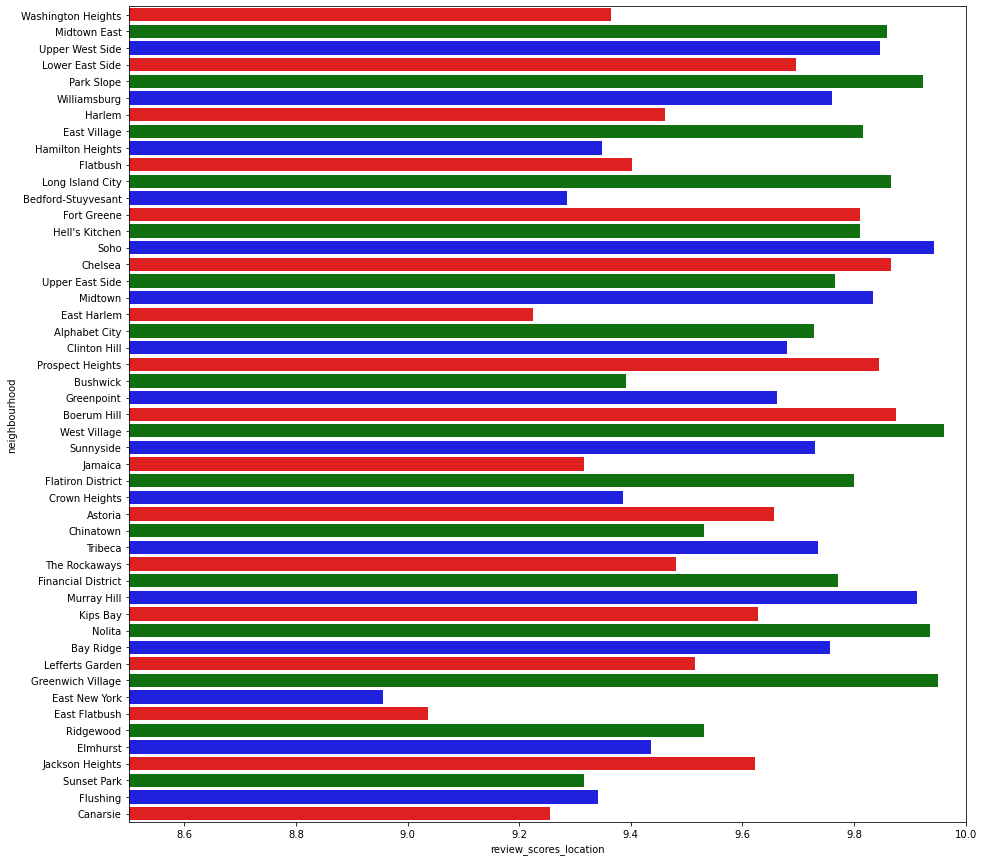

In [32]:
plt.figure(figsize=(15,15))
local = sns.barplot(x = 'review_scores_location' , y = 'neighbourhood', data = df, palette = ["red", "green", "blue"],  ci = False).set(xlim=(8.5,10))

In [43]:
locscore = df[['review_scores_location', 'neighbourhood']].copy
locscore 
#= locscore.DataFrame()
#locscore.sort_values(by=['review_scores_location'], ascending=False)

<bound method NDFrame.copy of        review_scores_location       neighbourhood
0                         NaN  Washington Heights
1                        10.0  Washington Heights
2                         9.0  Washington Heights
3                         9.0  Washington Heights
4                         9.0  Washington Heights
...                       ...                 ...
20567                     NaN            Canarsie
20568                     NaN            Canarsie
20569                     NaN            Canarsie
20570                     NaN            Canarsie
20571                     NaN            Canarsie

[20572 rows x 2 columns]>

In [49]:
locss = df.filter(['review_scores_location', 'neighbourhood'], axis=1)
locss = locss.sort_values(by=['review_scores_location'], ascending=False)
locss

,review_scores_location,neighbourhood
1,10.0,Washington Heights
11932,10.0,Midtown
11921,10.0,Midtown
11922,10.0,Midtown
11923,10.0,Midtown
...,...,...
20567,NaN,Canarsie
20568,NaN,Canarsie
20569,NaN,Canarsie
20570,NaN,Canarsie


In [87]:
hoodies = locss.groupby('neighbourhood').agg(count=('neighbourhood', 'count'), avgscore=('review_scores_location', 'mean')).reset_index()
hoodies = hoodies.sort_values(by=['avgscore'], ascending=False)
hoodies

,neighbourhood,count,avgscore
47,West Village,358,9.960573
22,Greenwich Village,130,9.950980
39,Soho,138,9.943182
35,Nolita,107,9.935484
36,Park Slope,284,9.923404
34,Murray Hill,114,9.913043
4,Boerum Hill,103,9.875000
7,Chelsea,549,9.866667
30,Long Island City,108,9.865672
33,Midtown East,414,9.858871


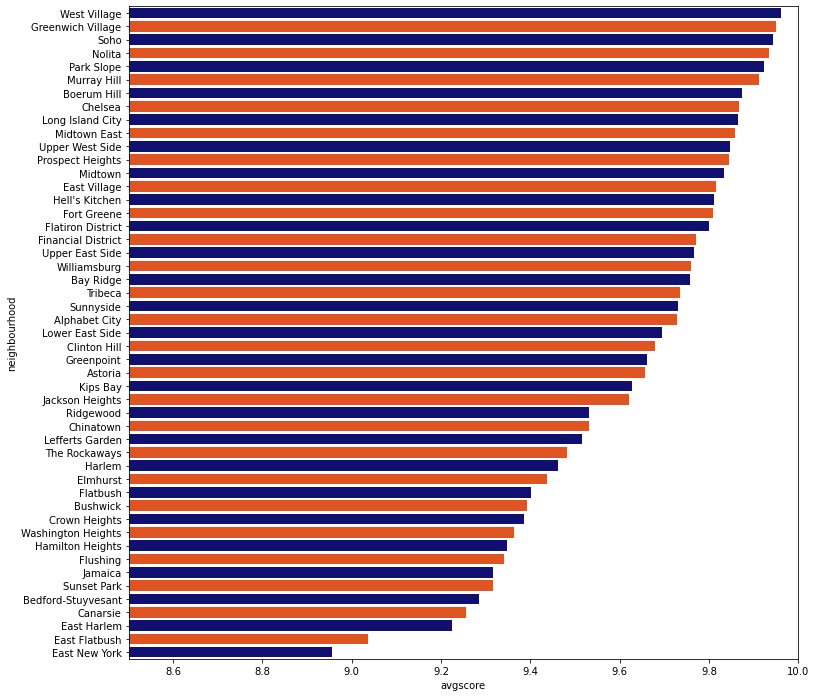

In [85]:
plt.figure(figsize=(12,12))
lolss = sns.barplot(x = 'avgscore' , y = 'neighbourhood', data = hoodies, palette = ["navy",  "orangered"],  ci = False).set(xlim=(8.5,10))

In [86]:
hoodies.to_csv(r'~/Downloads/airhoodies.csv')